# Covariance Comparison

In [7]:
import sacc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.io.fits as fits

In [4]:
txpipe = sacc.Sacc.load_fits('/global/cscratch1/sd/elp25/TXPipe/summary_statistics_real_kids.sacc')

In [5]:
cov_txpipe = txpipe.covariance.covmat

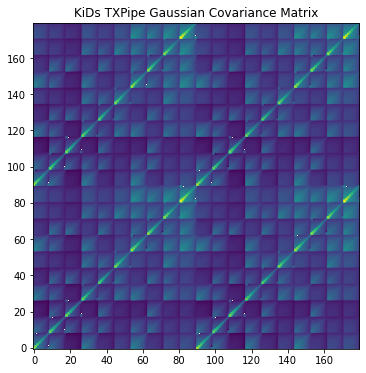

In [6]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(6,6))
plt.imshow(cov_txpipe,norm=LogNorm(), origin='lower left')
plt.title('KiDs TXPipe Gaussian Covariance Matrix')
plt.show()

In [9]:
data_dir = '/global/projecta/projectdirs/lsst/groups/WL/projects/wl-txpipe-hack/KIDS/KiDS-450_COSMIC_SHEAR_DATA_RELEASE/'

In [10]:
cov_kids = pd.read_table(data_dir+'/COV_MAT/xipmcutcov_KiDS-450_analytic_inc_m.dat',names=['i','j','Cov(i,j)'],skiprows=1,delim_whitespace=True)

In [13]:
cov_matrix = np.ones((130,130))
for index, row in cov_kids.iterrows():
    cov_matrix[int(row['i'])-1][int(row['j'])-1] = row['Cov(i,j)']

In [16]:
def get_published_cov(cov_matrix,dt,i,j):
    
    if dt=='xip':
        theta_bins = 7 
        index1i = i*13
        index2i = i*13+7
        index1j = j*13
        index2j = j*13+7
    if dt=='xim':
        theta_bins = 6
        index1i = i*13+7
        index2i = i*13+7+6
        index1j = j*13+7
        index2j = j*13+7+6
    
    
    cov = cov_matrix[index1j:index2j,index1i:index2i]
    return cov

In [19]:
theta_txpipe, xi  = txpipe.get_theta_xi('galaxy_shear_xi_plus', 'source_0', 'source_0',returnco)

In [25]:
data_dir = '/global/cscratch1/sd/elp25/TXPipe/data/kids450/outputs/'

In [26]:
kids_data = sacc.Sacc.load_fits(data_dir+'twopoint_data_real.sacc')

In [27]:
kids_data_cov = sacc.Sacc.load_fits('/global/cscratch1/sd/elp25/TXPipe/summary_statistics_real_kids.sacc')

In [28]:
kids_data.add_covariance(kids_data_cov.covariance)

In [43]:
kids_data.get_tracer_combinations()

[('source_0', 'source_0'),
 ('source_1', 'source_0'),
 ('source_1', 'source_1'),
 ('source_2', 'source_0'),
 ('source_2', 'source_1'),
 ('source_2', 'source_2'),
 ('source_3', 'source_0'),
 ('source_3', 'source_1'),
 ('source_3', 'source_2'),
 ('source_3', 'source_3')]

In [51]:
iis = np.array([0,1,1,2,2,2,3,3,3,3])
jjs = np.array([0,0,1,0,1,2,0,1,2,3])

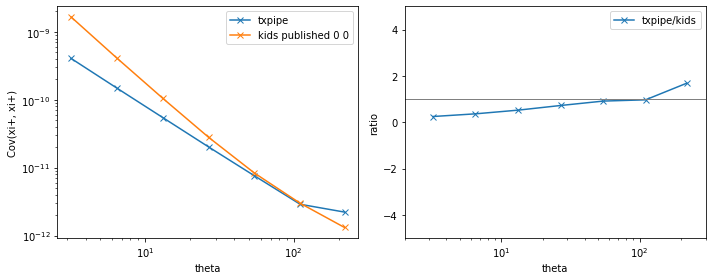

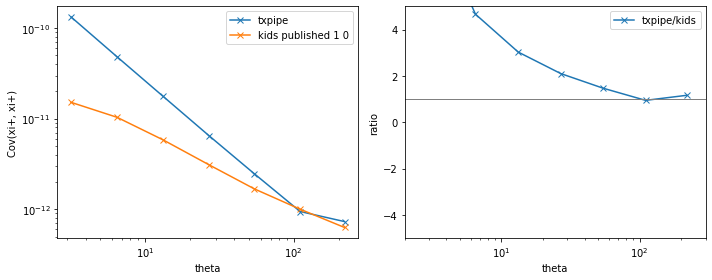

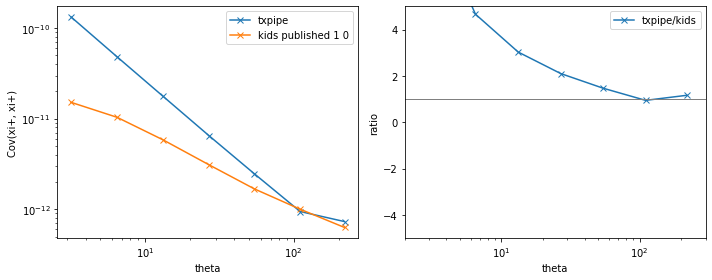

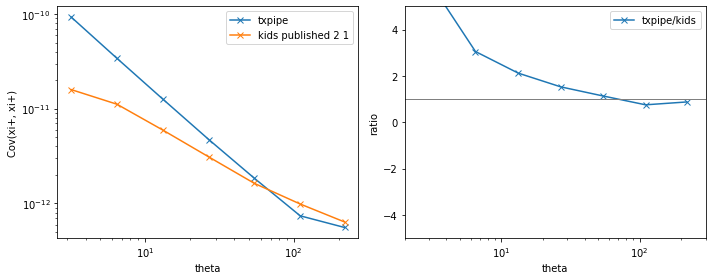

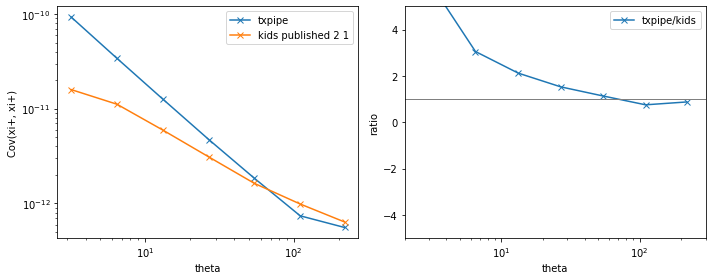

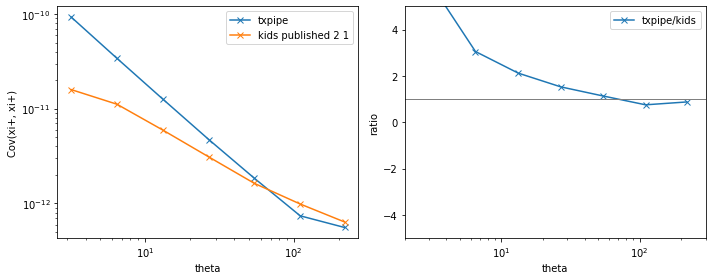

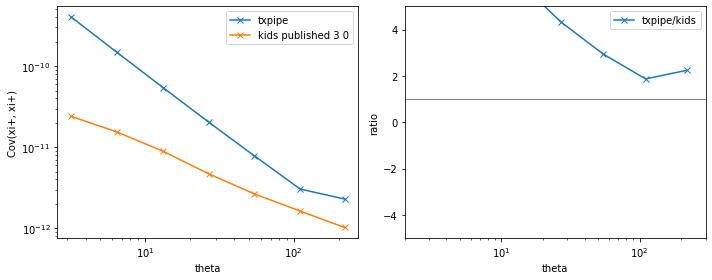

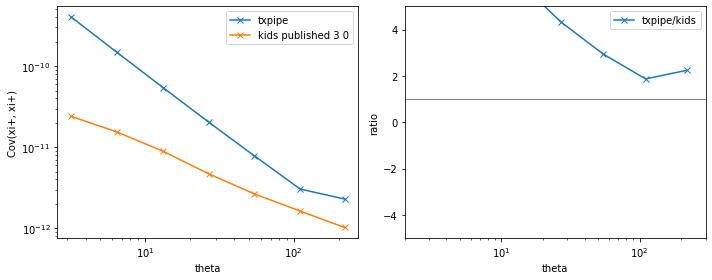

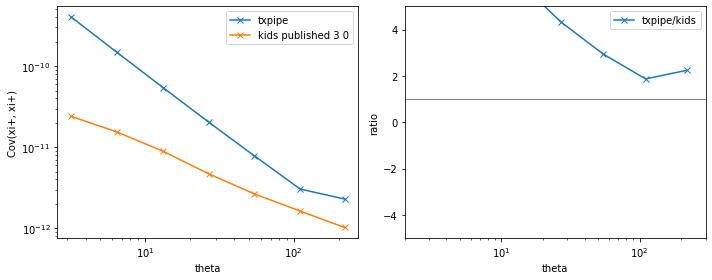

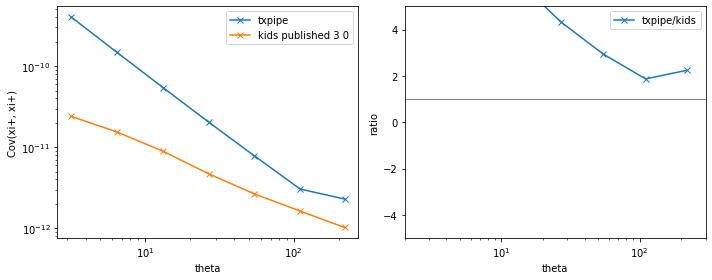

In [52]:
for i in range(10):
    dt = 'xip'
    plt.figure(figsize=(10,4))
    
    i = iis[i]
    j = jjs[i]

    if dt==sacc.standard_types.galaxy_shear_xi_plus:
            theta, xi, cov = kids_data.get_theta_xi(
            'galaxy_shear_xi_plus', 
            'source_' + str(i), 
            'source_' + str(j),
            return_cov=True,
                )
    else:
            theta, xi, cov = kids_data.get_theta_xi(
            'galaxy_shear_xi_minus', 
            'source_' + str(i), 
            'source_' + str(j),
            return_cov=True,
                )

    plt.subplot(121)
    plt.loglog(theta_txpipe[2:9], np.diag(cov)[2:9], marker='x', label='txpipe')
    cov_kids = get_published_cov(cov_matrix,dt,i,j)
    plt.loglog(theta_txpipe[2:9], np.diag(cov_kids), marker='x', label='kids published '+str(i)+' '+str(j))

    plt.xlabel('theta')
    plt.ylabel('Cov(xi+, xi+)')
    plt.legend()

    plt.subplot(122)
    plt.semilogx(theta_txpipe[2:9], np.diag(cov)[2:9]/np.diag(cov_kids), marker='x', label='txpipe/kids')

    plt.xlabel('theta')
    plt.ylabel('ratio')
    plt.legend()
    plt.ylim(-5,5)
    plt.plot([2,300],[1,1], color='grey', lw=1)
    plt.xlim(2,300)
    plt.tight_layout()